# Filtrer navn fra bøker

In [1]:
import dhlab.nbtext as nb
import dhlab.token_map as tm
from dhlab.module_update import update, css
import dhlab.graph_networkx_louvain as gnl
import json
import re
%matplotlib inline
css()

Importer filter fra token_map som ligger i modules. Det vil bli litt patching før ny versjon av `dhlab`.

In [2]:
update('token_map', overwrite=True)
from token_map import filter_names

Updated file `C:\Users\larsj\Documents\GitHub\NER\token_map.py`

### Gazetter

Gazettene ligger her, følger med repoet fra Github.

In [3]:
first_names = json.load(open("NER-gazetter/first_names.json"))
last_names = json.load(open("NER-gazetter/last_names.json"))
full_names = json.load(open("NER-gazetter/name_structure.json"))
male_names = json.load(open("NER-gazetter/male_names.json"))
female_names = json.load(open("NER-gazetter/female_names.json"))

### Korpus

Hent noen bøker...

In [4]:
urns = nb.book_corpus(title='%røde rubin%', limit=30)
urns

,urn,author,title,year
0,2008021104029,"Mykle, Agnar",Sangen om den røde rubin,1995
1,2008021404040,"Mykle, Agnar",Sangen om den røde rubin,1995
2,2008111304085,"Mykle, Agnar",Sangen om den røde rubin,2001
3,2015022308062,,Sangen om den røde rubin,2010
4,2015090129001,"Mykle, Agnar",Sangen om den røde rubin,1956
5,2016020808126,"Mykle, Agnar",Sangen om den røde rubin,2000
6,2007052404016,"Mykle, Agnar",Sangen om den røde rubin,1967
7,2009033100094,"Mykle, Agnar",Sangen om den røde rubin,2002
8,2014040406070,,Sangen om den røde rubin,2010
9,2008100104083,"Mykle, Agnar",Sangen om den røde rubin,1998


In [5]:
# velger Røde rubin bok som eksempel nedover

book = 2008111304085

Generer navn med nb.names()

In [6]:
names = nb.names(book)

Se på names med tm.show_names(). 

In [7]:
tm.show_names(names)

Lag 1

    Ask - 874
    Daniel - 121
    Doffen - 113
    Gud - 88
    Embla - 86
    Robert - 69
    Constance - 63
    Eirik - 46
    Wilhelmine - 46
    Fiffolo - 45
    Økonomiske - 44
    Stabell - 42
    Norge - 39
    Molly - 37
    Floden - 34
    Stallen - 33
    Francis - 29
    Wolfgang - 29
    Villsvinsen - 27
    Sosialistisk - 26
    Tyskland - 26
    Studentlag - 24
    Burlefot - 23
    Abrahamsen - 22
    Poppi - 22
    Taraldsen - 21
    Gunnhild - 20
    Frankrike - 18
    Hm - 18
    Maia - 18
    Vil - 17
    Hitler - 16
    Studentersamfunnet - 15
    Takk - 15
    Dem - 13
    Guds - 13
    Oslo - 13
    Daniels - 12
    Marx - 12
    Synnøve - 11
    Doffens - 10
    Gerda - 10
    Paris - 10
    Tananarivo - 10
    Bill - 9
    Haydn - 9
    Constances - 8
    Eh - 8
    Gjør - 8
    Hallo - 8
    Smith-Hermansen - 8
    Villsvinsens - 8
    Genossen - 7
    Roberts - 7
    Thea - 7
    Busserl - 6
    God - 6
    Grand - 6
    Hu - 6
    James - 6
    Seeber

Filtrer og rensk opp navnelisten med `filter_names()` importert fra `token_map`. Variablene `first_names` og `last_names` slås sammen til en liste som en felles gazett. Lagt 'Burlefot' til gazetten.

In [11]:
filtered_names = filter_names(names, first_names + last_names + ['Burlefot'])

`filtered_names` er en dict med to attributt, ett `filtered` og ett `removed`, sånn at man kan se hva som er fjernet og hvordan det filtrerte funkerer. Om det er fjernet for mye kan det bare legges til i gazetten og hele filtreringen kan kjøres på nytt (i tilfellet her med Mykle er det gjort). Merk at 4-ordsnavnene er bedre, men det mangler noe fremdeles på formen. Litt navnegrammatikk kunne gjøre susen her. Det er greit å få til. Nedenfor ser vi at det blir feil med 4-ordsnavn på formen "fornavn fornavn etternavn fornavn" som kan lukes vekk med en grammatikk.

In [12]:
tm.show_names(filtered_names['filtered'])

Lag 1

    Ask - 874
    Daniel - 121
    Embla - 89
    Robert - 69
    Constance - 63
    Eirik - 46
    Wilhelmine - 46
    Stabell - 43
    Molly - 37
    Floden - 34
    Francis - 29
    Wolfgang - 29
    Burlefot - 23
    Abrahamsen - 22
    Taraldsen - 21
    Gunnhild - 20
    Maia - 18
    Hitler - 16
    Oslo - 13
    Daniels - 12
    Marx - 12
    Synnøve - 11
    Gerda - 10
    Paris - 10
    Bill - 9
    Haydn - 9
    Constances - 8
    Gjør - 8
    Das - 7
    Maria - 7
    Roberts - 7
    Thea - 7
    Hu - 6
    James - 6
    Rød - 6
    Seeberg - 6
    Stravinsky - 6
    Ding - 5
    Herr - 5
    Schopenhauer - 5
    Siv - 5
    Wolfgangs - 5
    Abrahamsens - 4
    Anders - 4
    Astrid - 4
    Emblas - 4
    Erling - 4
    Goethe - 4
    Gullaksen - 4
    Johannes - 4
    Mozart - 4
    Schubert - 4
    Therese - 4
    Øverland - 4
    Arnulf - 3
    Balder - 3
    Falk - 3
    Fredriksen - 3
    Gunnhilds - 3
    Hamsun - 3
    Jespersen - 3
    Karl - 3
    Kristi - 

Her kan man se hva som er fjernet, som stedsnavn og diverse titler. Men også Fjodor er borte. Kan legges til før ny kjøring.

In [13]:
tm.show_names(filtered_names['removed'])

Lag 1

    Doffen - 113
    Gud - 88
    Fiffolo - 45
    Økonomiske - 44
    Norge - 39
    Stallen - 33
    Villsvinsen - 27
    Sosialistisk - 26
    Tyskland - 26
    Studentlag - 24
    Poppi - 22
    Frankrike - 18
    Hm - 18
    Vil - 17
    Studentersamfunnet - 15
    Takk - 15
    Dem - 13
    Guds - 13
    Doffens - 10
    Tananarivo - 10
    Eh - 8
    Hallo - 8
    Smith-Hermansen - 8
    Villsvinsens - 8
    Genossen - 7
    Busserl - 6
    God - 6
    Grand - 6
    Askeladd - 5
    Askeladden - 5
    Atacama - 5
    Djevelen - 5
    Europa - 5
    Jaha - 5
    Mhm - 5
    Pause - 5
    Ta - 5
    Trotsky - 5
    Aha - 4
    Bedre - 4
    Blir - 4
    Din - 4
    Fikk - 4
    Munkestad - 4
    Norges - 4
    Rubenspiken - 4
    Skal - 4
    Studentersamfunnet. - 4
    Tombson - 4
    Universitetet - 4
    Vel - 4
    Wenn - 4
    Audhumbla - 3
    Dorisk - 3
    Elman - 3
    Flose - 3
    Frygisk - 3
    Goethefrakk - 3
    Goethefrakken - 3
    Jomfru - 3
    Kagga - 3


Lager en ny variabel for å referere til de filtrerte navnene, mest for å slippe hakeparenteser

In [14]:
neo_names = filtered_names['filtered']

Det tar litt tid å beregne `token_map` så greit å legge den i variabel

In [15]:
neo_token_map = tm.token_map(neo_names)

### Data fra boken

Tell opp navn med `tm.count_name_strings` ... det ser ut som det fremdeles trengs til litt opprydding. Spesielt de lange navne lager litt ballade, men det er mulig å fjerne dem helt. Nettverk under der igjen.

In [16]:
name_count = tm.count_name_strings(book, neo_token_map)

In [17]:
name_count

,0
Ask_Burlefot,897
Daniel,133
Embla,90
Robert_Seeberg,82
Eirik_Floden,80
Francis_Stabell,74
Constance,71
Wilhelmine,46
Molly,40
Wolfgang,34


In [18]:
G = tm.character_network(book, neo_token_map)

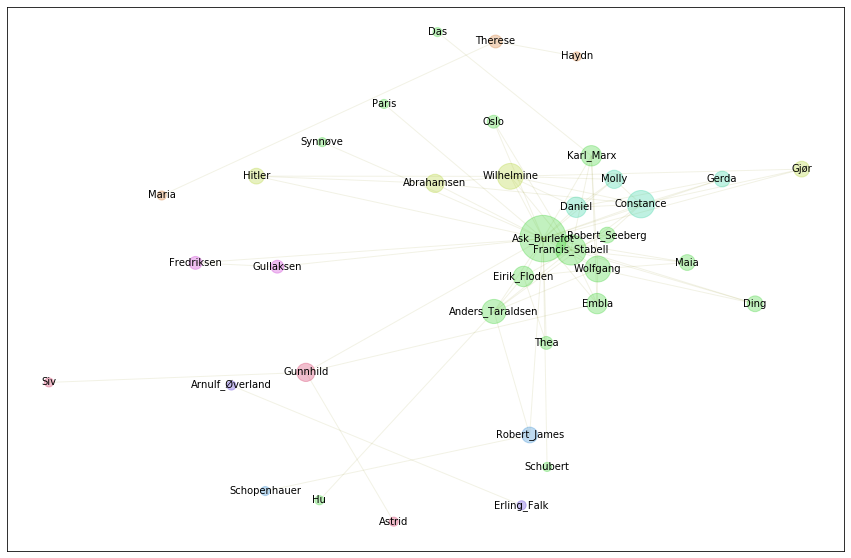

In [24]:
gnl.show_graph(G, spread=1.4)

In [27]:
nb.urn_concordance(word='Francis', urns=book)

"Sangen om den røde rubin, Mykle, Agnar, 2001",seg i praktiske oppgaver. Denne,Francis,"Stabell , lektor i matematikk"
"Sangen om den røde rubin, Mykle, Agnar, 2001",var i samme rom som,Francis,"Stabell , ikke når man"
"Sangen om den røde rubin, Mykle, Agnar, 2001",et øyeblikk hvor Ask forstod,Francis,StabelFs hemmelige sorg : den
"Sangen om den røde rubin, Mykle, Agnar, 2001",grunnene til,Francis,Stabell ' s manglende suksess
"Sangen om den røde rubin, Mykle, Agnar, 2001",og mange andres mening var,Francis,Stabell en mann så kunnskapsrik


In [20]:
gnl.show_communities(G)

Wilhelmine-Abrahamsen :  Wilhelmine, Abrahamsen, Hitler, Gjør

Ask_Burlefot-Francis_Stabell :  Ask_Burlefot, Francis_Stabell, Wolfgang, Anders_Taraldsen, Eirik_Floden, Embla, Karl_Marx, Ding, Maia, Robert_Seeberg, Oslo, Thea, Paris, Schubert, Hu, Das, Synnøve

Constance-Daniel :  Constance, Daniel, Molly, Gerda

Robert_James-Schopenhauer :  Robert_James, Schopenhauer

Arnulf_Øverland-Erling_Falk :  Arnulf_Øverland, Erling_Falk

Gullaksen-Fredriksen :  Gullaksen, Fredriksen

Gunnhild-Siv :  Gunnhild, Siv, Astrid

Therese-Maria :  Therese, Maria, Haydn



### Lagring og manuell redigering

Lagre til fil for redigering, viktig å ta med parameteret `orient` og sette det til `row` (Excel klarer bare 256 kolonner). Filnavn for lagring og skriving børe være vanligvis være forskjellige. Rutinene passer på å ikke skrive over eksisterende filer. 

Ser også at koblingen mellom navn er vel logisk generert og ikke kommer fra bokens innholds. Det kan fikses på. Vi ser på det ved neste møte.

In [21]:
tm.names_to_token_map_file(neo_names, filename='mykle_rubin.xls', orient='row')

True

In [29]:
edit_names = tm.read_token_map_file('mykle_rubin.xls', orient='row')